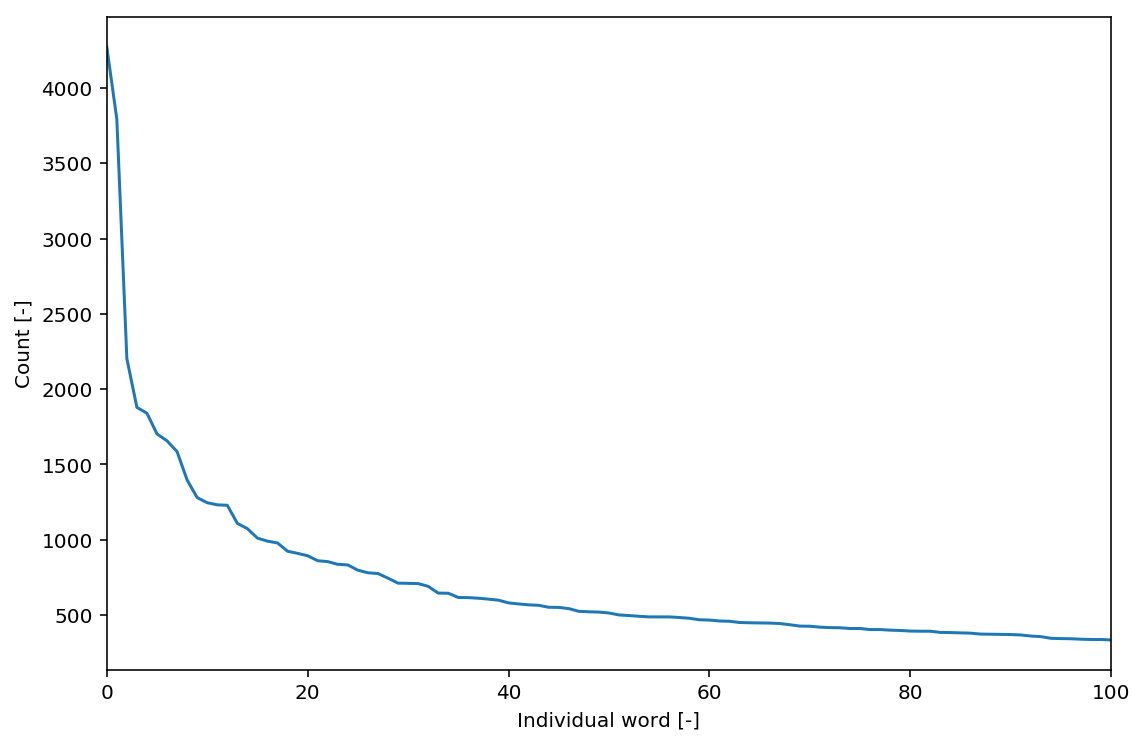

The first 50 words are regarded as trivial:
movie, see, 2, go, de, review, film, good, like, day, watch, the, one, new, im, want, get, trailer, time, love, video, via, 3, youtube, night, la, â, u, look, best, great, wanna, really, win, man, game, 2014, come, going, 2015, premiere, que, last, year, 1, kill, en, make, saw, it


In [143]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from collections import Counter
import matplotlib.pyplot as plt
import math


stop = stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
flat_list = [item for sublist in doc_clean for item in sublist]
freq_words = sorted(Counter(flat_list).items(), key=lambda pair: pair[1], reverse=True)


def clean(doc, stop):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalised = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised


df = pd.read_csv('finalmergingfile.csv')
doc_clean = [clean(doc, stop).split() for doc in df.content_x]
flat_list = [item for sublist in doc_clean for item in sublist]
freq_words = sorted(Counter(flat_list).items(), key=lambda pair: pair[1], reverse=True)
df_freq_plot = pd.DataFrame([_[1] for _ in freq_words], columns=['Frequency [-]'])
df_freq_plot = df_freq_plot.loc[0:100, :]
df_freq_plot['Frequency [-]'].plot(figsize=(9, 6))
plt.xlabel('Individual word [-]')
plt.ylabel('Count [-]')
plt.show()

new_stopwords = [_[0] for _ in freq_words][:50]
print('The first 50 words are regarded as trivial:')
print(', '.join(new_stopwords))
stop.extend(new_stopwords)
stop = list(set(stop))
doc_clean = [clean(doc, stop).split() for doc in df.content_x]
doc_clean = [[j for j in i if j not in stop] for i in doc_clean]
dct = corpora.Dictionary(doc_clean)
corpus = [dct.doc2bow(_) for _ in doc_clean]
c_train, c_test = corpus[:370], corpus[370:]

In [144]:
perp_ls = list()
for i in range(2, 13):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=c_train, num_topics=i, id2word=dct)
    perp = ldamodel.log_perplexity(c_test)
    perp_ls.append(2**perp)

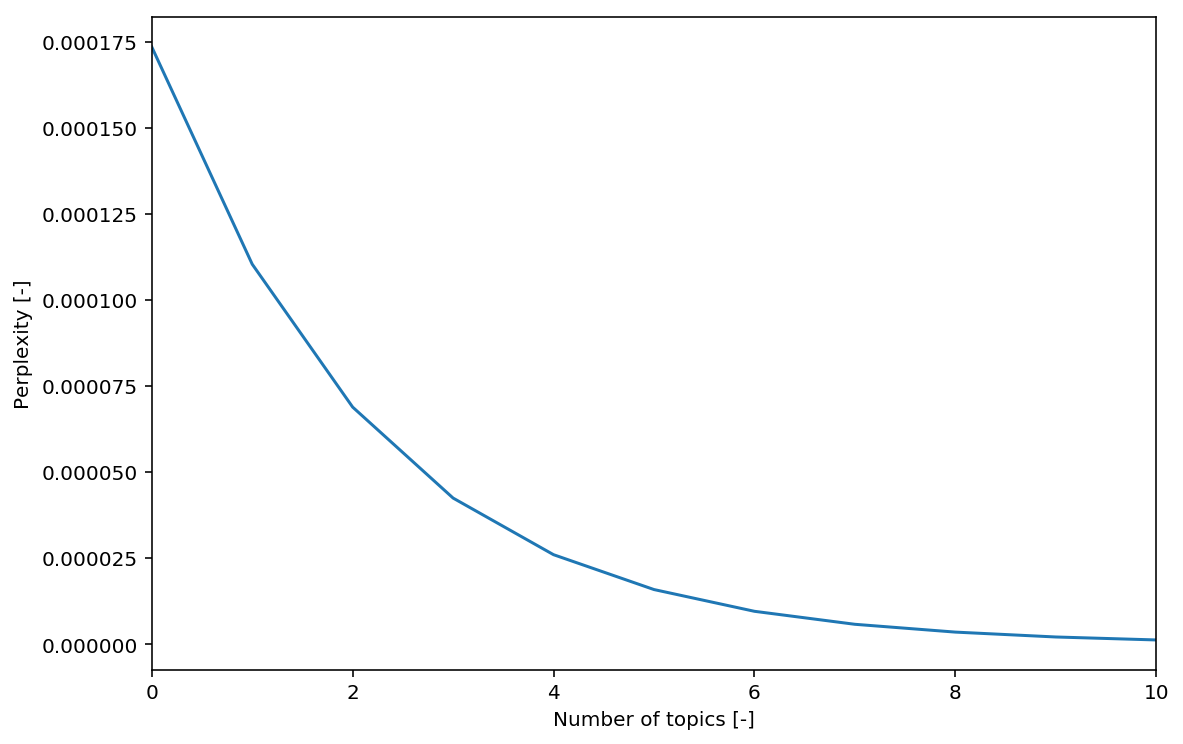

In [145]:
perp_plot = pd.DataFrame(perp_ls, columns=['Perplexity [-]'])
perp_plot['Perplexity [-]'].plot(figsize=(9, 6))
plt.xlabel('Number of topics [-]')
plt.ylabel('Perplexity [-]')
plt.show()

In [146]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=c_train, num_topics=4, id2word=dct)
ldamodel.print_topics(num_topics=4, num_words=10)

[(0,
  '0.003*"perfect" + 0.003*"road" + 0.002*"hotel" + 0.002*"second" + 0.002*"simbubot" + 0.002*"age" + 0.002*"rt" + 0.002*"horror" + 0.002*"men" + 0.002*"max"'),
 (1,
  '0.003*"boy" + 0.002*"life" + 0.002*"way" + 0.002*"need" + 0.002*"room" + 0.002*"next" + 0.002*"liked" + 0.002*"legend" + 0.002*"light" + 0.001*"theater"'),
 (2,
  '0.002*"war" + 0.002*"bad" + 0.002*"america" + 0.002*"tale" + 0.002*"e" + 0.002*"five" + 0.002*"star" + 0.001*"horrible" + 0.001*"age" + 0.001*"theater"'),
 (3,
  '0.002*"hunger" + 0.002*"part" + 0.002*"v" + 0.001*"believe" + 0.001*"god" + 0.001*"along" + 0.001*"mockingjay" + 0.001*"amazing" + 0.001*"free" + 0.001*"got"')]